In [76]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import os 
import pickle 


In [77]:
df = pd.read_csv('D:/oprncv/test_vf/test.csv')

In [78]:
df.sample(5)


,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
18939,focus,0.699363,0.577608,-1.292780,0.999508,0.712367,0.544618,-1.255500,0.999064,0.718775,...,-0.014529,0.0,0.732513,0.571137,0.001640,0.0,0.736083,0.567430,0.002209,0.0
13591,unfocus,0.576255,0.523026,-0.626359,0.999374,0.600010,0.488376,-0.625563,0.998679,0.616756,...,-0.025930,0.0,0.628475,0.494688,-0.027924,0.0,0.631916,0.491433,-0.029064,0.0
2718,unfocus,0.608923,0.128567,-0.612549,0.999992,0.612453,0.098582,-0.570386,0.999989,0.622458,...,-0.000766,0.0,0.638924,0.085354,0.018719,0.0,0.641380,0.082611,0.019562,0.0
17150,focus,0.630669,0.494984,-1.162642,0.999849,0.652282,0.457647,-1.153026,0.999695,0.667752,...,-0.024280,0.0,0.665184,0.455202,-0.028007,0.0,0.668183,0.451464,-0.029177,0.0
8151,unfocus,0.617621,0.174475,-1.009356,0.999780,0.615501,0.134843,-0.963811,0.999685,0.625446,...,-0.001193,0.0,0.634961,0.127706,0.016281,0.0,0.637196,0.123480,0.017102,0.0


In [79]:
df.describe()

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
count,20664.000000,20664.000000,20664.000000,20664.000000,20664.000000,20664.000000,20664.000000,20664.000000,20664.000000,20664.000000,...,20664.000000,20664.0,20664.000000,20664.000000,20664.000000,20664.0,20664.000000,20664.000000,20664.000000,20664.0
mean,0.598590,0.427752,-0.744502,0.997997,0.612346,0.397194,-0.718421,0.997694,0.622521,0.396232,...,-0.009241,0.0,0.630804,0.397203,0.001236,0.0,0.633603,0.394159,0.001446,0.0
std,0.123173,0.115336,0.289980,0.007051,0.124750,0.117437,0.292174,0.007544,0.124451,0.118349,...,0.009092,0.0,0.127348,0.123773,0.018444,0.0,0.127662,0.124148,0.019437,0.0
min,0.086775,0.044348,-1.889563,0.846209,0.082785,0.001092,-1.933495,0.857254,0.093660,-0.000991,...,-0.047406,0.0,0.130847,-0.012954,-0.060371,0.0,0.133730,-0.022371,-0.063758,0.0
25%,0.520090,0.352792,-0.968134,0.998885,0.529964,0.323171,-0.943589,0.998468,0.539418,0.321349,...,-0.015171,0.0,0.545868,0.317546,-0.012188,0.0,0.548070,0.314679,-0.012650,0.0
50%,0.589897,0.459470,-0.759623,0.999703,0.605825,0.428329,-0.737436,0.999553,0.616967,0.427432,...,-0.009549,0.0,0.623902,0.431022,0.002625,0.0,0.626988,0.428444,0.002997,0.0
75%,0.679239,0.519322,-0.542557,0.999872,0.697024,0.490587,-0.514511,0.999804,0.708035,0.490324,...,-0.002159,0.0,0.717012,0.492020,0.015745,0.0,0.720453,0.489269,0.016722,0.0
max,1.012085,0.770851,0.018275,0.999999,1.023622,0.752604,0.028514,0.999999,1.038266,0.751979,...,0.018066,0.0,1.040988,0.759763,0.062877,0.0,1.047024,0.758167,0.066461,0.0


In [80]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

In [81]:
y.value_counts()

unfocus    15145
focus       5519
Name: class, dtype: int64

In [82]:
len(X.columns)

2004

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=2)

In [84]:
print(X.shape, X_train.shape, X_test.shape)

(20664, 2004) (16531, 2004) (4133, 2004)


In [85]:
model = RandomForestClassifier(n_estimators=2)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=2)

In [86]:
model.score(X_test, Y_test)
 

0.9112025163319623

In [87]:
 y_predicted = model.predict(X_test)


In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predicted)

Text(69.0, 0.5, 'Truth')

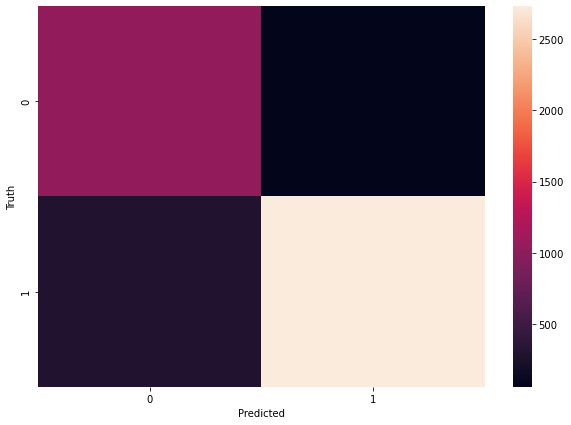

In [91]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm )
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [95]:
with open('D:/oprncv/test_vf/model_gg.pkl', 'wb') as f:
    pickle.dump(model, f)